INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOLOGIA DE SANTA CATARINA \
CAMPUS FLORIANÓPOLIS \
DEPARTAMENTO ACADÊMICO DE ELETRÔNICA \
ENGENHARIA ELETRÔNICA

Estudante: Marcelo Brancalhão Gaspar

# Detecção de objetos coloridos

## Espaço de cor HSV com OpenCV2

Vimos que no espaço de cor HSV, o canal H (*hue*, matiz) apresenta certa independência em relação à iluminação de um objeto. Essa característica pode ser explorada para a detecção de objetos. Teste o código seguinte.

Observe como é obtida a máscara (imagem binária, só preto e branco) e como aplicar uma operação _AND_ para separar na imagem original só os M&Ms azuis.

In [29]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import numpy as np
import cv2 # para instalar: pip install opencv-python
import matplotlib.pyplot as plt

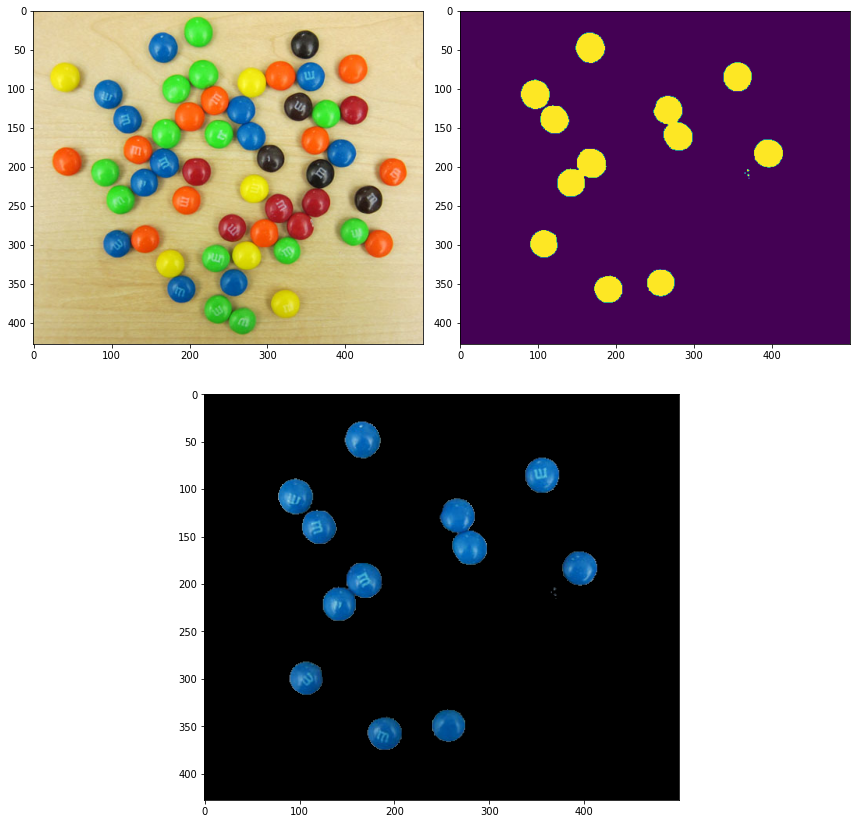

In [31]:
# Adaptado de http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html

frame = cv2.cvtColor(cv2.imread("mms.jpg"), cv2.COLOR_BGR2RGB) #obtida de http://blogs.mathworks.com/images/steve/2010/mms.jpg

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV);
# define range of blue color in HSV
blue=100 #importante: faixa da componente H no OpenCV: [0, 179]
thres=10
lower_blue = np.array([blue-thres,50,50])
upper_blue = np.array([blue+thres,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(frame)
plt.subplot(2,2,2)
plt.imshow(mask)
plt.subplot(2,1,2)
plt.imshow(res)
plt.tight_layout()
plt.show()


### Responda
1. Na função *cvtColor*, que outras conversões estão disponíveis?


### Estão disponíveis várias conversões entre os formatos: RGB, RGBA, BGR, HSV e GRAYSCALE. Listados abaixo:

In [32]:
for color_option in dir(cv2):
    if 'COLOR' in color_option and '2' in color_option and 'IMREAD' not in color_option:
        print(color_option)

COLOR_BAYER_BG2BGR
COLOR_BAYER_BG2BGRA
COLOR_BAYER_BG2BGR_EA
COLOR_BAYER_BG2BGR_VNG
COLOR_BAYER_BG2GRAY
COLOR_BAYER_BG2RGB
COLOR_BAYER_BG2RGBA
COLOR_BAYER_BG2RGB_EA
COLOR_BAYER_BG2RGB_VNG
COLOR_BAYER_GB2BGR
COLOR_BAYER_GB2BGRA
COLOR_BAYER_GB2BGR_EA
COLOR_BAYER_GB2BGR_VNG
COLOR_BAYER_GB2GRAY
COLOR_BAYER_GB2RGB
COLOR_BAYER_GB2RGBA
COLOR_BAYER_GB2RGB_EA
COLOR_BAYER_GB2RGB_VNG
COLOR_BAYER_GR2BGR
COLOR_BAYER_GR2BGRA
COLOR_BAYER_GR2BGR_EA
COLOR_BAYER_GR2BGR_VNG
COLOR_BAYER_GR2GRAY
COLOR_BAYER_GR2RGB
COLOR_BAYER_GR2RGBA
COLOR_BAYER_GR2RGB_EA
COLOR_BAYER_GR2RGB_VNG
COLOR_BAYER_RG2BGR
COLOR_BAYER_RG2BGRA
COLOR_BAYER_RG2BGR_EA
COLOR_BAYER_RG2BGR_VNG
COLOR_BAYER_RG2GRAY
COLOR_BAYER_RG2RGB
COLOR_BAYER_RG2RGBA
COLOR_BAYER_RG2RGB_EA
COLOR_BAYER_RG2RGB_VNG
COLOR_BGR2BGR555
COLOR_BGR2BGR565
COLOR_BGR2BGRA
COLOR_BGR2GRAY
COLOR_BGR2HLS
COLOR_BGR2HLS_FULL
COLOR_BGR2HSV
COLOR_BGR2HSV_FULL
COLOR_BGR2LAB
COLOR_BGR2LUV
COLOR_BGR2Lab
COLOR_BGR2Luv
COLOR_BGR2RGB
COLOR_BGR2RGBA
COLOR_BGR2XYZ
COLOR_BGR2YCR_CB
CO

2. O que faz a função *inRange*?

### A função inRange gera a máscara da imagem a partir da faixa de valores utilizados no formato de cor especificado.

## Vídeo da webcam ou ESP32-CAM

Se você tiver uma câmera (webcam), pode testar o mesmo processo com uma captura direta do sinal de vídeo. Caso contrário, use a câmera da placa **ESP32-CAM**, usando o mesmo processo de configuração do servidor descrito nas atividades anteriores.

In [33]:
 !pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Inclua, aqui, um quadro capturado e o resultado. Para isso, você deve gravar as imagens com *imwrite* e incorporar o link com o código mostrado abaixo. Ao enviar seu relatório, inclua as imagens no pacote zip.

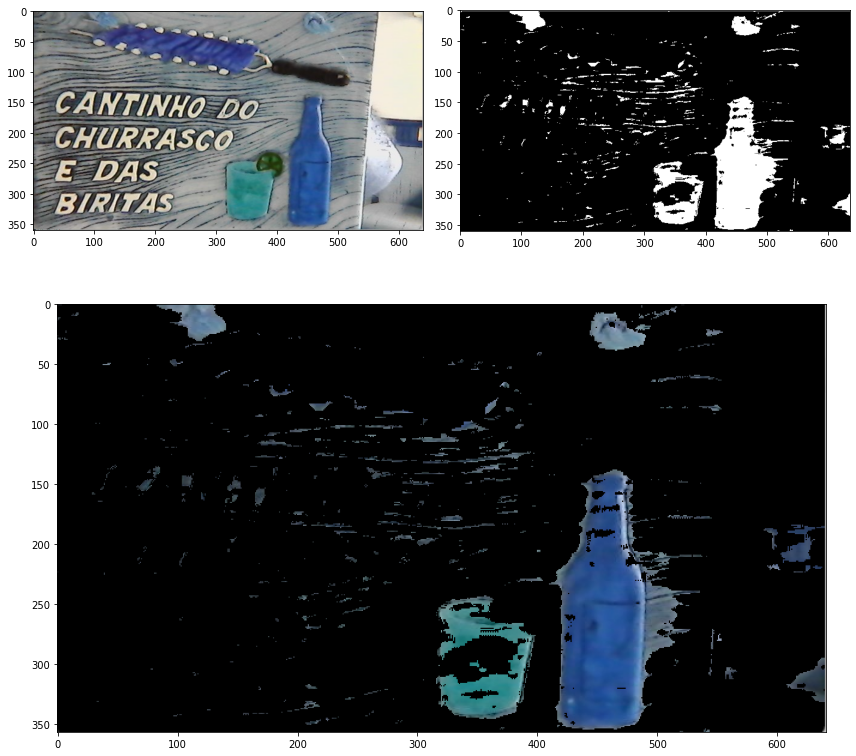

In [35]:
frame = cv2.cvtColor(cv2.imread("frame.png"), cv2.COLOR_BGR2RGB);
mask = cv2.cvtColor(cv2.imread("mask.png"), cv2.COLOR_BGR2RGB);
res = cv2.cvtColor(cv2.imread("res.png"), cv2.COLOR_BGR2RGB);

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(frame)
plt.subplot(2,2,2)
plt.imshow(mask)
plt.subplot(2,1,2)
plt.imshow(res)
plt.tight_layout()
plt.show()

Como exemplo, observe o que obtive com a minha webcam.
![webcam-identifica-azul](webcam-identifica-azul.png "Imagem da webcam com identificação de azul")

## Operações morfológicas

Você deve ter observado que há ruído na máscara e também balas conectadas, que seriam contadas como um objeto único posteriormente. Uma forma de fazer uma "limpeza" é através de operações morfológicas. 

![mascara-anotada](mascara-MMs-anotada.png "Máscara da imagem M&Ms com anotação")

Elas são operações baseadas no formato da imagem. Usam um *kernel* ou elemento estruturante que define a operação. Os operadores básicos são erosão e dilatação.

### Erosão

A ideia básica da erosão é retirar os pixels que estão nas bordas do objeto (objeto é o que está em branco, ou seja, com intensidade 1).

O elemento estruturante desliza sobre a imagem, como na convolução 2D. Um pixel na imagem resultado será 1 se todos os pixels no kernel forem 1, caso contrário, será erodido (intensidade 0).

Desse modo, os pixels próximos às bordas serão descartados. Quanto? Depende do tamanho do kernel. Essa operação é útil, por exemplo, para remover ruídos isolados de pequeno tamanho e separar dois objetos conectados.

Há vários exemplos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/erode.htm

Observe o exemplo com um elemento estruturante 5x5. Mostre o resultado.


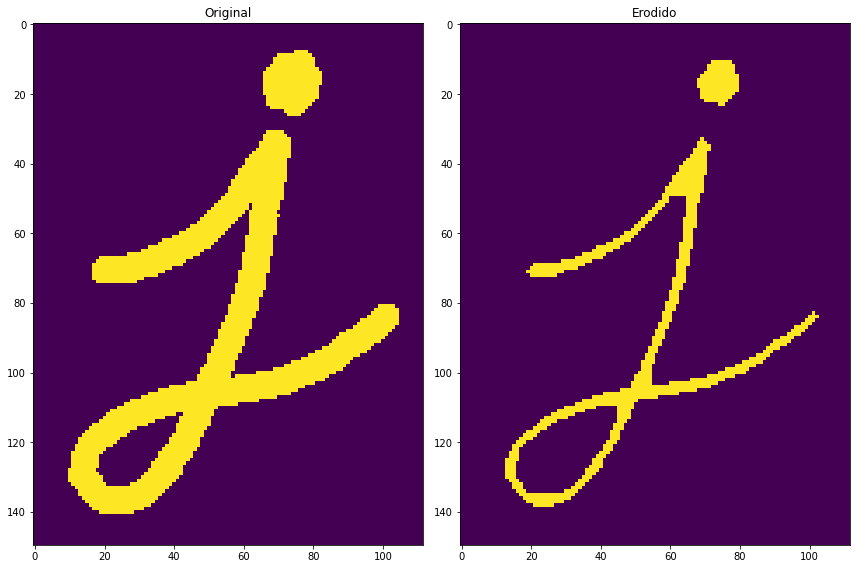

In [36]:
#Exemplo de http://docs.opencv.org/3.2.0/d9/d61/tutorial_py_morphological_ops.html
import cv2
import numpy as np
img = cv2.imread('j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
#inclua o código para visualização do resultado
plt.figure(figsize=(12, 12));
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Erodido")
plt.imshow(erosion)
plt.tight_layout()
plt.show()

### Dilatação

É o oposto da erosão. Aqui, um pixel resultado será 1 se pelo menos um dos pixels sob análise for 1. Desse modo, há um aumento do tamanho do objeto (aumento da região branca).

Dilatação é comumente aplicada após uma operação de erosão para redução de ruído. Também é útil para unir partes de um objeto.

Aplique a operação e mostre o resultado.

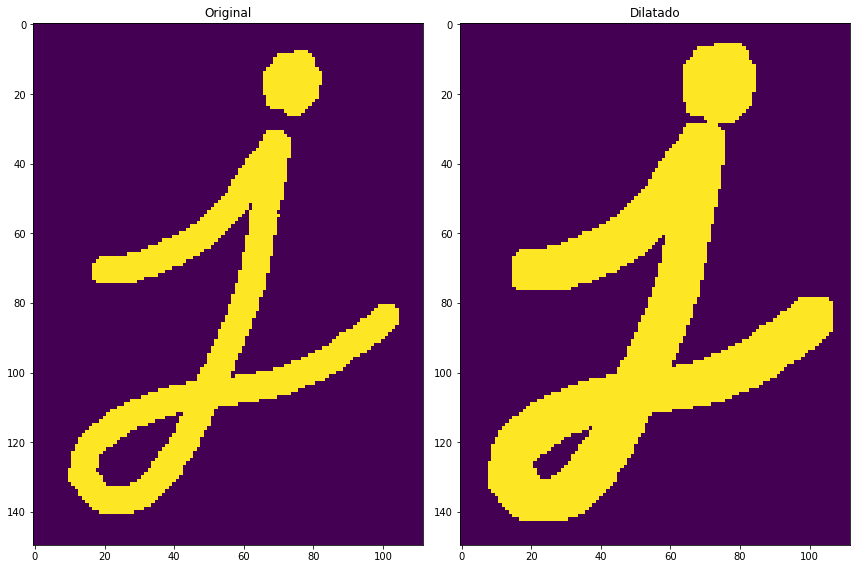

In [37]:
dilation = cv2.dilate(img,kernel,iterations = 1)
#inclua o código para visualização do resultado
plt.figure(figsize=(12, 12))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Dilatado")
plt.imshow(dilation)
plt.tight_layout()
plt.show()

In [38]:
from google.colab.patches import cv2_imshow

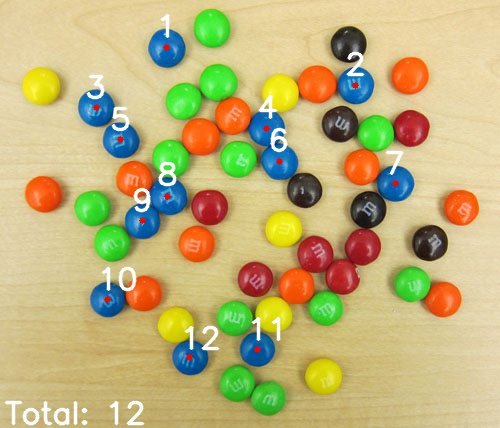

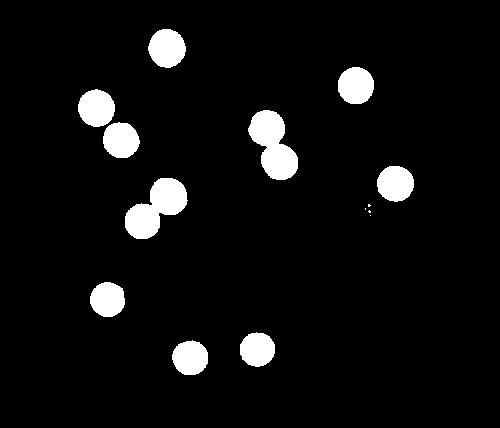

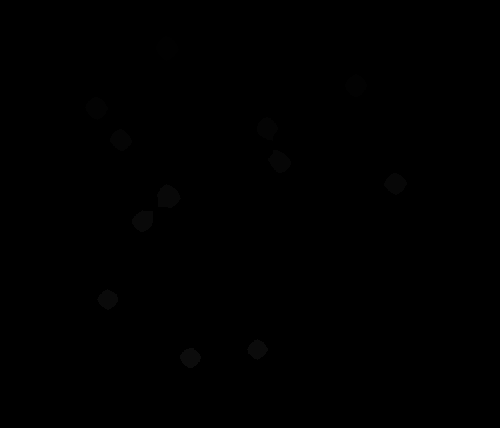

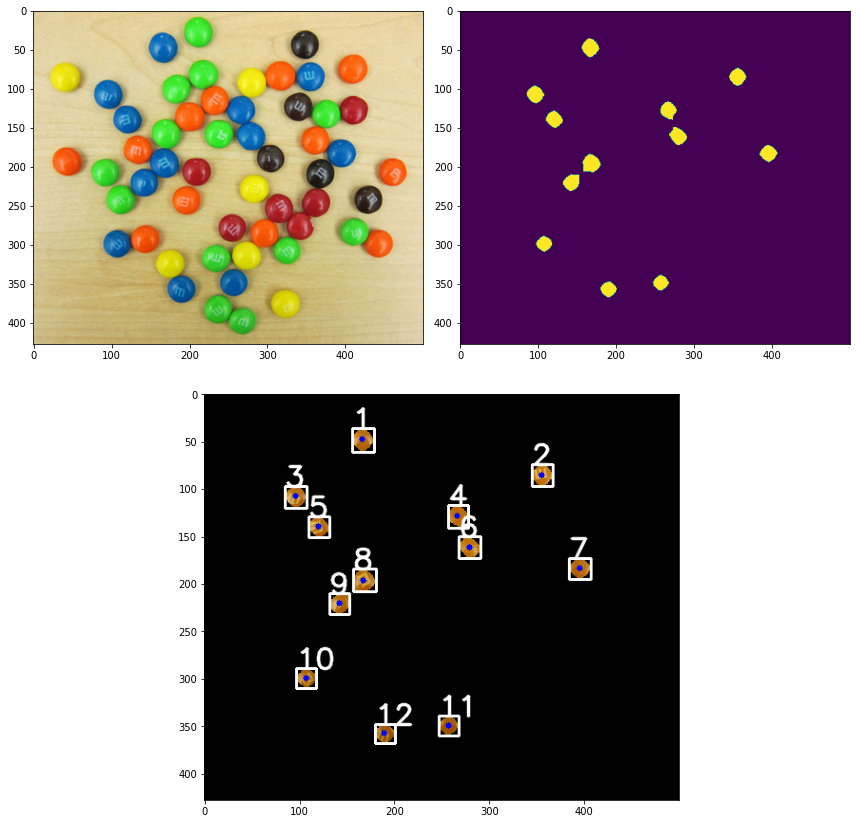

In [39]:
# Adaptado de http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html
import numpy as np
import cv2

frame = cv2.imread("mms.jpg") #obtida de http://blogs.mathworks.com/images/steve/2010/mms.jpg

# Convert BGR to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
# define range of blue color in HSV
blue=100 #importante: faixa da componente H no OpenCV: [0, 179]
thres=10
lower_blue = np.array([blue-thres,50,50])
upper_blue = np.array([blue+thres,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 3)
#erosion=mask
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= erosion)

# find all blobs and label them
n, labels, stats, centroids = cv2.connectedComponentsWithStats(erosion)
font = cv2.FONT_HERSHEY_SIMPLEX
for n in range(1,len(stats)): #o primeiro (índice 0) é a imagem toda, então, desconsiderar
    cv2.rectangle(res,(stats[n][0],stats[n][1]), (stats[n][0]+stats[n][2],stats[n][1]+stats[n][3]),(255,255,255),2)
    cv2.putText(res,str(n),(stats[n][0],stats[n][1]), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.circle(res,(int(centroids[n][0]), int(centroids[n][1])), 3, (0,0,255), -1)
    
    cv2.putText(frame,str(n),(stats[n][0],stats[n][1]), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.circle(frame,(int(centroids[n][0]), int(centroids[n][1])), 3, (0,0,255), -1)
    
cv2.putText(frame,'Total: '+str(n),(5, stats[0][3]-5), font, 1,(255,255,255),2,cv2.LINE_AA)
cv2.imwrite('colorlabels.jpg',res) #para gravar a imagem

cv2_imshow(frame)
cv2_imshow(mask)
cv2_imshow(labels)
#cv2.imshow('frame',frame)
#cv2.imshow('mask',erosion)
#cv2.imshow('labels', res)

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(cv2.imread("mms.jpg"), cv2.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.imshow(erosion)
plt.subplot(2,1,2)
plt.imshow(res)
plt.tight_layout()
plt.show()


In [40]:
cv2.waitKey(0)
cv2.destroyAllWindows()

## Contador de balas

Com todas essas ferramentas, agora você vai fazer um contador automático de balas.

Para contagem das balas, usamos o método de *componentes conectados*, também chamado de *extração de blobs* [https://en.wikipedia.org/wiki/Connected-component_labeling]. A função do OpenCV informa a posição (*centroids* no exemplo) e outros dados (*stats* no exemplo). Para escrever na tela, usa-se a função *putText*.

O código a seguir usa a imagem _mms.jpg_ como exemplo. Observe que há:
1. Escolha da cor e limiar de detecção
2. Erosão para redução de ruídos
3. Detecção de elementos pelo algoritmo de componentes conectados
4. Apresentação dos resultados

In [41]:
print(centroids)
# que informações são essas? Verifique o retorno da função cv2.connectedComponentsWithStats

[[250.2206512  214.08892625]
 [166.59677419  47.7983871 ]
 [355.48837209  85.20930233]
 [ 96.07714286 107.70857143]
 [266.70623145 128.13353116]
 [120.41230769 139.58769231]
 [279.13256484 161.14409222]
 [395.03592814 183.24550898]
 [167.60740741 196.39753086]
 [142.76315789 220.28362573]
 [107.45993031 299.02787456]
 [257.00719424 349.        ]
 [189.92567568 357.38175676]]


### Os centroids são os centros geométricos dos componentes conectados obtidos da imagem.

In [42]:
print(stats)
# que informações são essas? Verifique o retorno da função cv2.connectedComponentsWithStats

[[     0      0    500    428 209983]
 [   156     36     23     25    372]
 [   345     74     22     23    344]
 [    85     97     23     23    350]
 [   257    117     21     24    337]
 [   110    129     22     22    325]
 [   268    150     23     23    347]
 [   384    173     23     22    334]
 [   157    184     24     24    405]
 [   132    210     21     22    342]
 [    97    289     21     21    287]
 [   247    339     21     21    278]
 [   180    348     21     20    296]]


### Os stats são as coordenadas dos objetos delineadas pelas vértices de um retângulo de menor diagonal possível com seus lados paralelos aos seus respectivos eixos.

![MMs-identificados](azul-identificado.jpg "Imagem M&Ms com contagem dos azuis")

Depois de entender o processo, **escolha** uma das imagens anexadas à atividade ou faça uma captura com a sua ESP32-CAM e conte as balas de uma cor específica (escolha também a cor).

Seu algoritmo não precisa ter 100% de precisão, mas você deve explicar os possíveis motivos para uma contagem incorreta.

Inclua seu código, imagens de resultado, análises e conclusões.

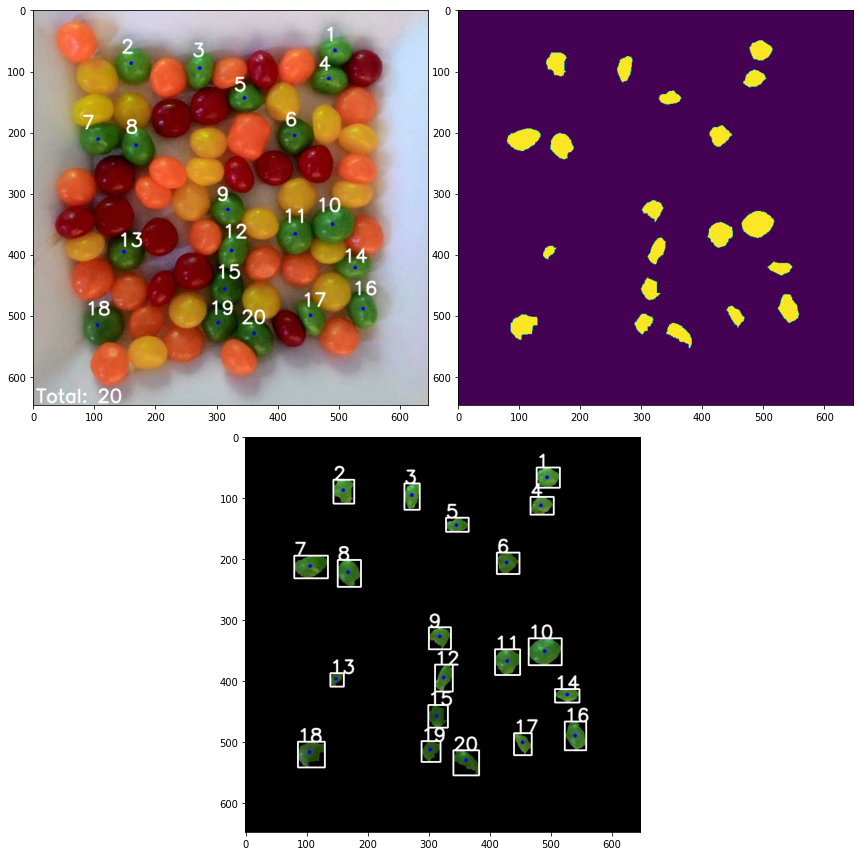

In [43]:
# Adaptado de http://docs.opencv.org/3.2.0/df/d9d/tutorial_py_colorspaces.html
import numpy as np
import cv2

frame = cv2.cvtColor(cv2.imread("balas.jpeg"), cv2.COLOR_BGR2RGB) 
# Convert RGB to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

yellow=60; #importante: faixa da componente H no OpenCV: [0, 179]
thres=20;
lower_yellow = np.array([yellow-thres,50,50])
upper_yellow = np.array([yellow+thres,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 3);
# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask = erosion)

# find all blobs and label them
n, labels, stats, centroids = cv2.connectedComponentsWithStats(erosion)
font = cv2.FONT_HERSHEY_SIMPLEX
for n in range(1,len(stats)): #o primeiro (índice 0) é a imagem toda, então, desconsiderar
    cv2.rectangle(res,(stats[n][0],stats[n][1]), (stats[n][0]+stats[n][2],stats[n][1]+stats[n][3]),(255,255,255),2)
    cv2.putText(res,str(n),(stats[n][0],stats[n][1]), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.circle(res,(int(centroids[n][0]), int(centroids[n][1])), 3, (0,0,255), -1)
    
    cv2.putText(frame,str(n),(stats[n][0],stats[n][1]), font, 1,(255,255,255),2,cv2.LINE_AA)
    cv2.circle(frame,(int(centroids[n][0]), int(centroids[n][1])), 3, (0,0,255), -1)
    
cv2.putText(frame,'Total: '+str(n),(5, stats[0][3]-5), font, 1,(255,255,255),2,cv2.LINE_AA)
#cv2.imwrite('colorlabels.jpg',res) #para gravar a imagem
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(frame)
plt.subplot(2,2,2)
plt.imshow(erosion)
plt.subplot(2,1,2)
plt.imshow(res)
plt.tight_layout()
plt.show()

### Para identificar as balas verdes foi necessário um limiar (thresh) de maior magnitude, devido a mudança de tonalidade de verde entra as balas por conta da luminosidade.

### Este aumento do limiar pode ser um problema para casos onde alguma outra cor tenha uma matiz de cor próxima 

In [44]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
!jupyter nbconvert --to html Trabalho_1_DSP_2_Rejeita_Faixa.ipynb

[NbConvertApp] WARNING | pattern 'Trabalho_1_DSP_2_Rejeita_Faixa.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=